## Mall Customers Segmentation

Malls and shopping complexes often compete with each other to increase their customer base and hence make huge profits. To achieve this task machine learning is being applied in many stores already.It is amazing to realize the fact that how machine learning can aid in such ambitions. AI and ML already have been intimately involved in online shopping since, well, the beginning of online shopping. You can’t use Amazon or any other shopping service without getting recommendations, which are often personalized based on the vendor’s understanding of your traits: your purchase history, your browsing history, and possibly much more. The shopping complexes make use of their customer's data and develop ML models to target the right customers.This not only increases sales but also makes their business efficient.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv("Mall_Customers.csv")
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Observations:

Age of the customers ranges from 18-70. This shows that the mall attracts has shops and things which suite all age group people.
Average age of customers is 39.
Average income of customers is 60 K$.
Average spending score of customers is 50.

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [10]:
data.shape

(200, 5)

In [12]:
data.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [14]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

First step in any data science problem is to check for missing/null values. Let's just check that first.

<Axes: xlabel='count', ylabel='Gender'>

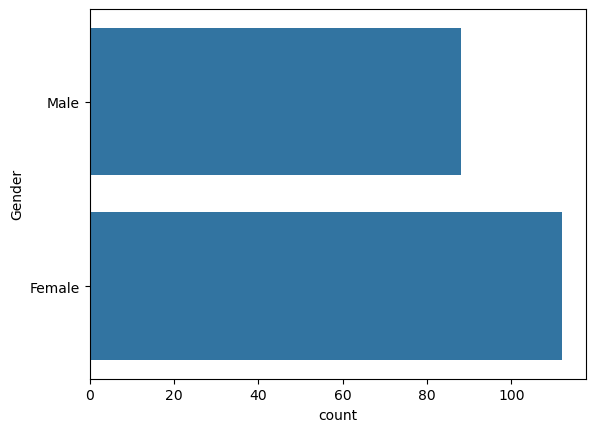

In [17]:
sns.countplot(data['Gender'])

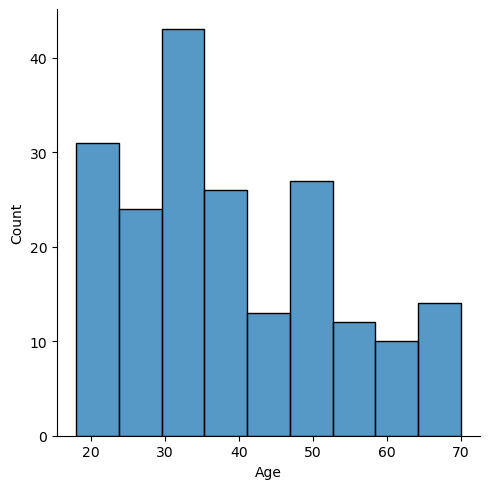

In [19]:
sns.displot(data['Age'])

C:\Users\Utkarsha\AppData\Local\Temp\ipykernel_14156\420288474.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Annual Income (k$)'])


<Axes: xlabel='Annual Income (k$)', ylabel='Density'>

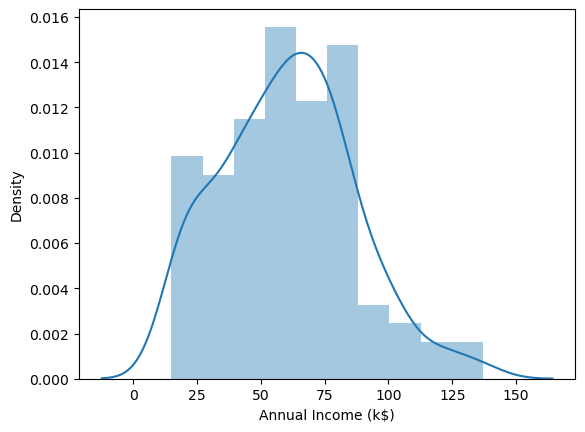

In [21]:
sns.distplot(data['Annual Income (k$)'])

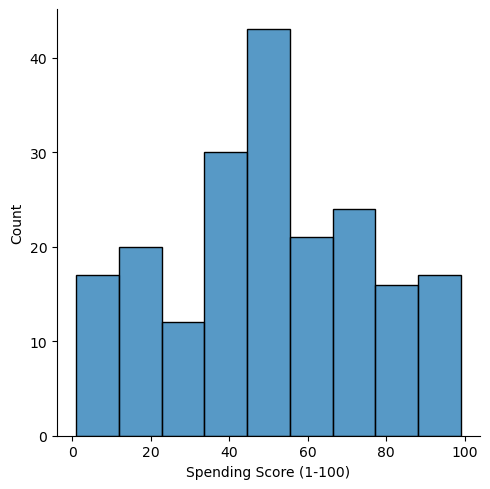

In [23]:
sns.displot(data['Spending Score (1-100)'])

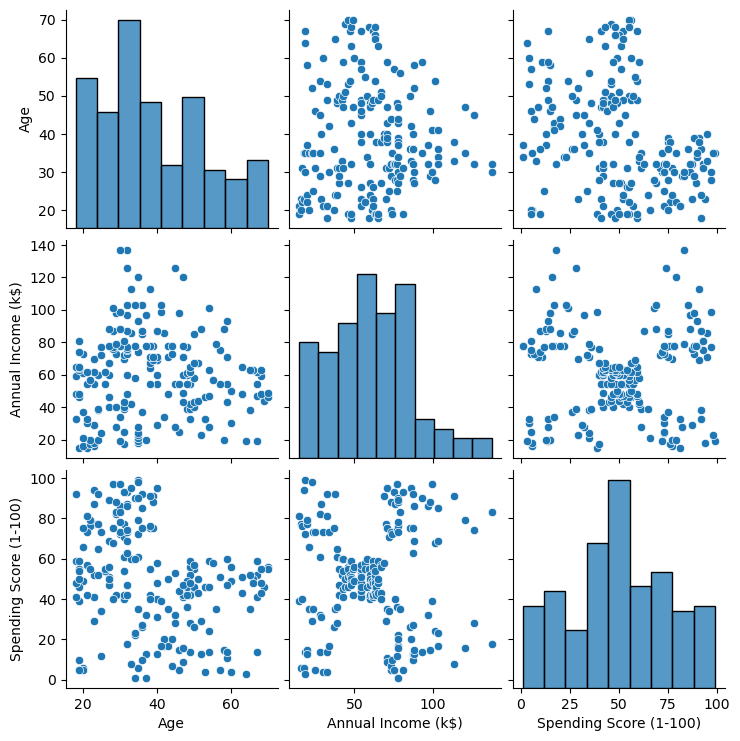

In [25]:
sns.pairplot(data[['Gender','Age','Annual Income (k$)','Spending Score (1-100)']])

In [27]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])

In [29]:
data.head(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6


In [31]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

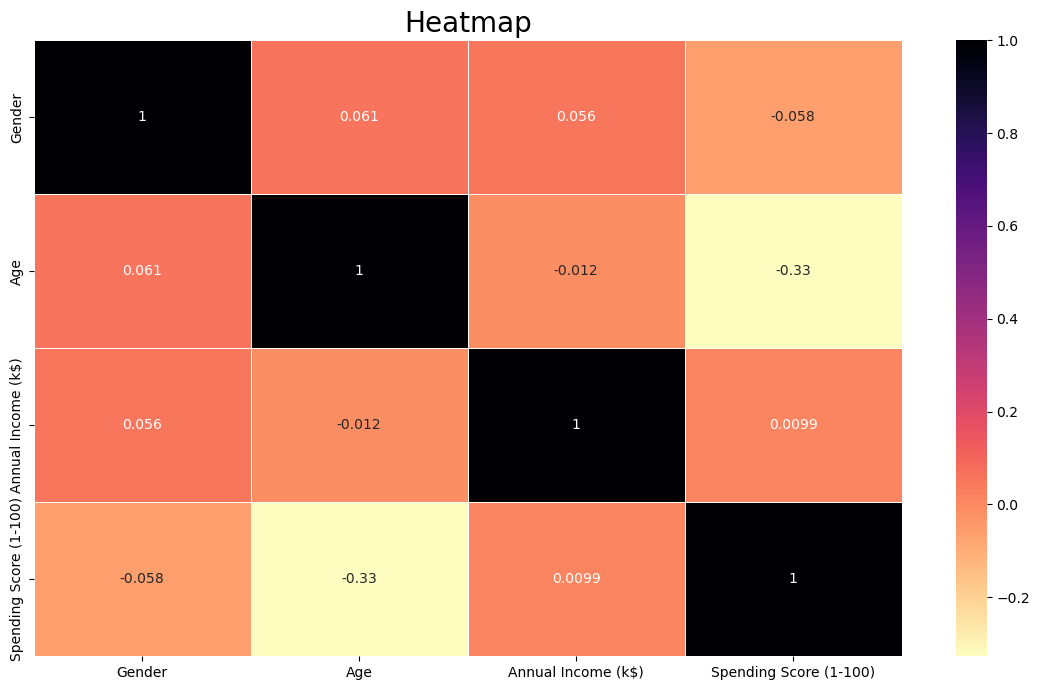

In [33]:
plt.rcParams['figure.figsize'] = (14, 8)
sns.heatmap(data[[ 'Gender', 'Age', 'Annual Income (k$)','Spending Score (1-100)']].corr(), cmap = 'magma_r', annot = True, linewidths=.5)
plt.title('Heatmap', fontsize = 20)
plt.show()

Text(30.636728395061724, 0.5, 'Spending Score (1-100)')

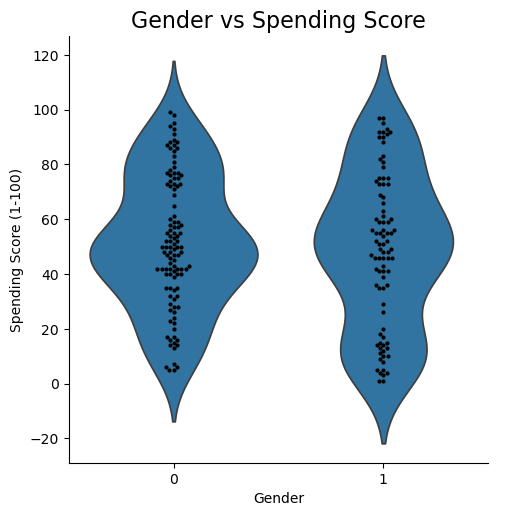

In [35]:
plt.rcParams['figure.figsize'] = (16, 7)
g = sns.catplot(x="Gender", y="Spending Score (1-100)", kind="violin", inner=None, data=data)
sns.swarmplot(x="Gender", y="Spending Score (1-100)", color="k", size=3, data=data, ax=g.ax);
plt.title('Gender vs Spending Score', fontsize = 16)
plt.xlabel('Gender')
plt.ylabel('Spending Score (1-100)')

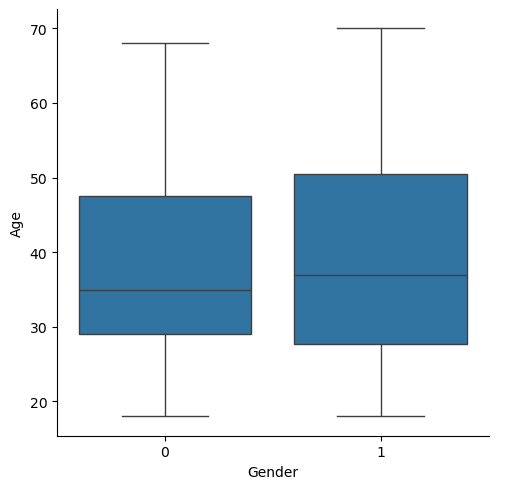

In [37]:
sns.catplot(x="Gender", y="Age", kind="box", data=data);

## K-Means Clustering

#### k-means clustering based on annual income
##### Elbow method to find the optimal number of Clusters

In [41]:
data=data.iloc[:,[3,4]].values
from sklearn.cluster import KMeans

In [43]:
wcss=[]

for i in range(1,11):
    km=KMeans(n_clusters=i, init="k-means++",random_state=0)
    km.fit(data)
    wcss.append(km.inertia_)   # inertia give the value of wcss which is help to plot the elbow graph.

C:\Users\Utkarsha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Utkarsha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Utkarsha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Utkarsha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory le

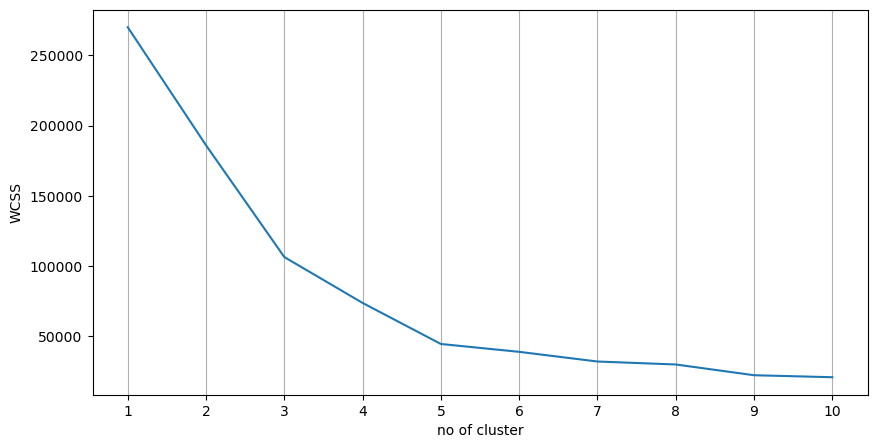

In [45]:
plt.figure(figsize=(10,5))
plt.plot([i for i in range(1,11)],wcss)
plt.xlabel("no of cluster")
plt.xticks([i for i in range(1,11)])
plt.ylabel("WCSS")
plt.grid(axis="x")
plt.show()

#### From the above figure, we can see that last most significant slope occurs at k = 5 , hence we will have 5 clusters in this case.

In [48]:
kmn=KMeans(n_clusters=5,init='k-means++',random_state=0)
kmneans=kmn.fit_predict(data)

C:\Users\Utkarsha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


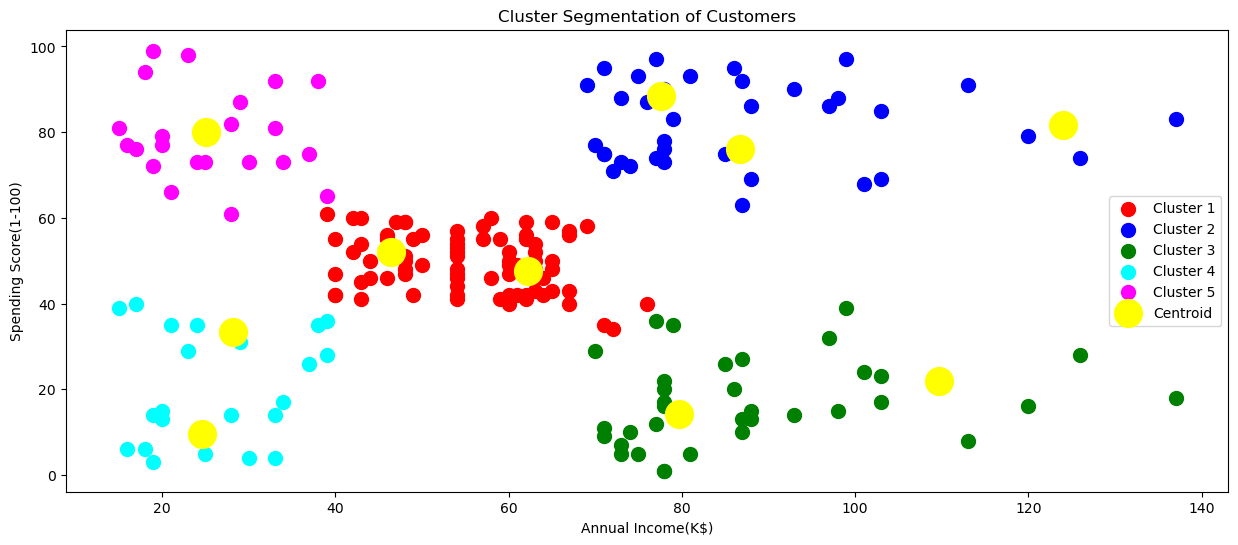

In [50]:
#plotting the the clusters
fig,ax = plt.subplots(figsize=(15,6))
ax.scatter(data[kmneans==0,0],data[kmneans==0,1],s=100,c='red',label='Cluster 1')
ax.scatter(data[kmneans==1,0],data[kmneans==1,1],s=100,c='blue',label='Cluster 2')
ax.scatter(data[kmneans==2,0],data[kmneans==2,1],s=100,c='green',label='Cluster 3')
ax.scatter(data[kmneans==3,0],data[kmneans==3,1],s=100,c='cyan',label='Cluster 4')
ax.scatter(data[kmneans==4,0],data[kmneans==4,1],s=100,c='magenta',label='Cluster 5')

ax.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],s=400,c='yellow',label='Centroid')
plt.title('Cluster Segmentation of Customers')
plt.xlabel('Annual Income(K$)')
plt.ylabel('Spending Score(1-100)')
plt.legend()
plt.show()